In [1]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.io import loadmat
from skimage import color, io
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix

In [4]:
def load_data(path):
    data = loadmat(path)
    return data['X'], data['y']

x_train, y_train = load_data("/kaggle/input/svhndataset/train_32x32.mat")
x_test, y_test = load_data("/kaggle/input/svhndataset/test_32x32.mat")

In [5]:
# Transpose image arrays
x_train = x_train.transpose((3, 0, 1, 2))
x_test = x_test.transpose((3, 0, 1, 2))

In [6]:
y_train = y_train.flatten()
y_test = y_test.flatten()

In [7]:
# Normalize the pixel values
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [8]:
# One-hot encode the labels
y_train = to_categorical(y_train % 10, 10)
y_test = to_categorical(y_test % 10, 10)

In [9]:
# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=False
)
datagen.fit(x_train)

In [10]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
# Train the model
history = model.fit(datagen.flow(x_train, y_train, batch_size=64), 
                    validation_data=(x_test, y_test),
                    epochs=20)

Epoch 1/20


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1145/1145 ━━━━━━━━━━━━━━━━━━━━ 84s 73ms/step - accuracy: 0.8674 - loss: 0.4534 - val_accuracy: 0.9282 - val_loss: 0.2707
Epoch 2/20
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 138s 69ms/step - accuracy: 0.8705 - loss: 0.4385 - val_accuracy: 0.9269 - val_loss: 0.2706
Epoch 3/20
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 83s 72ms/step - accuracy: 0.8717 - loss: 0.4353 - val_accuracy: 0.9316 - val_loss: 0.2591
Epoch 4/20
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 82s 71ms/step - accuracy: 0.8742 - loss: 0.4237 - val_accuracy: 0.9324 - val_loss: 0.2593
Epoch 5/20
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 83s 72ms/step - accuracy: 0.8772 - loss: 0.4212 - val_accuracy: 0.9345 - val_loss: 0.2511
Epoch 6/20
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 82s 72ms/step - accuracy: 0.8791 - loss: 0.4104 - val_accuracy: 0.9327 - val_loss: 0.2495
Epoch 7/20
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 85s 74ms/step - accuracy: 0.8836 - loss: 0.3966 - val_accuracy: 0.9334 - val_loss: 0.2515
Epoch 8/20
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 83s 72ms/step - accuracy: 0.8857 - loss: 0.3

814/814 - 6s - 8ms/step - accuracy: 0.9415 - loss: 0.2279
Test Accuracy: 0.9415
814/814 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      1744
           1       0.95      0.97      0.96      5099
           2       0.96      0.96      0.96      4149
           3       0.94      0.90      0.92      2882
           4       0.95      0.96      0.95      2523
           5       0.94      0.94      0.94      2384
           6       0.94      0.93      0.93      1977
           7       0.94      0.95      0.94      2019
           8       0.95      0.86      0.90      1660
           9       0.87      0.93      0.90      1595

    accuracy                           0.94     26032
   macro avg       0.94      0.94      0.94     26032
weighted avg       0.94      0.94      0.94     26032



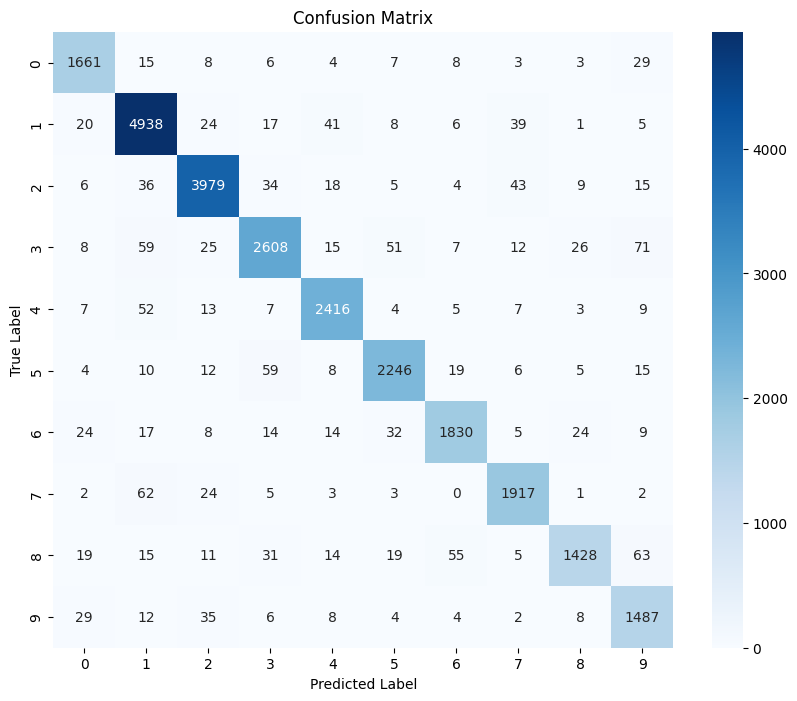

In [15]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f'Test Accuracy: {test_accuracy:.4f}')

# Generate classification report and confusion matrix
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

print(classification_report(y_true, y_pred_classes))
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()